In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", 
                   encoding="latin-1",usecols= ["v1", "v2"])
print(data.shape)
data.head()

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.columns = ["kind","message"]
data.head()

,kind,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
count = pd.DataFrame(data["kind"].value_counts().reset_index())

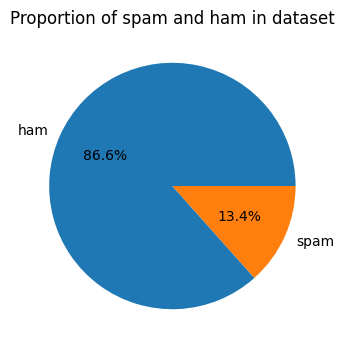

In [17]:
fig = plt.figure(figsize =(7, 4))
plt.pie(count["count"] , labels=count["kind"] ,autopct="%1.01f%%")
plt.title("Proportion of spam and ham in dataset")
plt.show()

In [23]:
data["type"]=data["kind"].map({"ham":0 , "spam":1})
data.head()

,kind,message,type
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
# X = data["message"]
y = data["type"]

# Using TF-IDF Vectorizer

In [25]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["message"])
# vectorizer.vocabulary_

In [26]:
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state=0
                                                     , stratify=y)

In [27]:
X_train.shape

(4457, 8672)

In [28]:
y_train.shape

(4457,)

## Using Logistic Regression as Classifier

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0 , penalty="l2" , max_iter=1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.71      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [44]:
accuracy_score(y_test , y_pred)

0.9596412556053812

## Using KNN as Classifier

In [30]:
clf = KNeighborsClassifier()

In [31]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       966
           1       1.00      0.28      0.43       149

    accuracy                           0.90      1115
   macro avg       0.95      0.64      0.69      1115
weighted avg       0.91      0.90      0.88      1115



**For this problem i.e. detecting message as SPAM or Legit there should be a trade-off between Precision and Recall and a good F1 Score ,but here the F1 Score for Legit messages is good but for SPAM messages it is not good . However the overall accuracy is 90% , but there could be better alternatives .**

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9031390134529148

## Using Naive Bayes as Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nclf = GaussianNB()
nclf.fit(X_train.toarray(), y_train)
y_pred = nclf.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       966
           1       0.56      0.83      0.67       149

    accuracy                           0.89      1115
   macro avg       0.77      0.87      0.80      1115
weighted avg       0.92      0.89      0.90      1115



**Here also , the same problem as KNN Classifier**

In [34]:
accuracy_score(y_test , y_pred)

0.8896860986547085

## Using SVM as Classifier

In [35]:
from sklearn.svm import SVC
sclf = SVC(kernel = 'linear', random_state = 0)
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
accuracy_score(y_test , y_pred)

0.9775784753363229

**Here using SVM Classifier we have a better F1 Score for both SPAM and Legit messages , hence it is a better classifier for this problem**

## Using Decision Tree as Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [42]:
accuracy_score(y_test , y_pred)

0.9641255605381166